In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME']="raninaattef"
os.environ['KAGGLE_KEY']="a269bf45e22b6bed87e181047763d366"
!kaggle datasets download -d yasserh/housing-prices-dataset #copy api

  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 3.28MB/s]


In [ ]:
!ls

housing-prices-dataset.zip  sample_data


In [ ]:
!unzip housing-prices-dataset

Archive:  housing-prices-dataset.zip
  inflating: Housing.csv             


In [ ]:
import keras
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.preprocessing import scale
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [ ]:
x_train_scaled = preprocessing.scale(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
model = Sequential()
model.add(Dense(64, kernel_initializer='normal', activation='relu',input_shape=(187,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mse',
 optimizer=RMSprop(),
 metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(x_train_scaled, y_train,
 batch_size=128,
epochs=500,
verbose=1,
validation_split = 0.2,
callbacks = [EarlyStopping(monitor = 'val_loss', patience =
20)])

Epoch 1/500
3/3 [==============================] - 2s 215ms/step - loss: 563.5707 - mean_absolute_error: 21.8856 - val_loss: 625.4168 - val_mean_absolute_error: 23.2318
Epoch 2/500
3/3 [==============================] - 0s 42ms/step - loss: 550.8540 - mean_absolute_error: 21.5820 - val_loss: 613.1986 - val_mean_absolute_error: 22.9588
Epoch 3/500
3/3 [==============================] - 0s 38ms/step - loss: 538.6356 - mean_absolute_error: 21.2904 - val_loss: 599.3733 - val_mean_absolute_error: 22.6497
Epoch 4/500
3/3 [==============================] - 0s 32ms/step - loss: 524.6436 - mean_absolute_error: 20.9629 - val_loss: 583.4100 - val_mean_absolute_error: 22.2922
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 508.4760 - mean_absolute_error: 20.5841 - val_loss: 565.0562 - val_mean_absolute_error: 21.8773
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 490.1532 - mean_absolute_error: 20.1519 - val_loss: 544.8300 - val_mean_absolute_error:

In [ ]:
score = model.evaluate(x_test_scaled, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 24.69391441345215
Test accuracy: 2.98757004737854


In [ ]:
prediction = model.predict(x_test_scaled)
print(prediction.flatten())
print(y_test)


4/4 [==============================] - 0s 3ms/step
[ 7.8982472 17.942911  20.930115  33.382442  24.608843  19.16551
 27.588234  22.018545  19.289196  22.220552  17.226427  16.333693
 16.176245  41.10094   19.998749  19.49204   26.22775   19.939028
 19.141615  36.92127   12.315139  15.918386  20.602259  15.410471
 21.38143   24.884207  30.402636  28.021963  10.748499  20.83661
 20.244158  14.0009575 32.592102  24.63807   18.057074   9.041084
 15.501806  18.88954   19.99048   25.99135   27.860472  27.638319
 14.904007  41.347027  28.929363  23.904242  26.475233  16.786467
 23.482672  22.683025  34.378574  18.309923  12.940126  15.420143
 34.991135  27.143213  13.109318  48.43059   33.718525  22.50103
 25.662527  17.954481  14.336828  18.651777  23.519972  21.713709
 13.1795025 21.988964  14.941265   7.3486056 36.388157  28.913652
 25.283585  14.796492  25.612288  17.864628  20.06618   23.951075
 34.560917  11.811614  20.276052  38.594925  14.976431  13.861254
 17.413109  18.449745  21.28

In [ ]:
import matplotlib.pyplot as plt


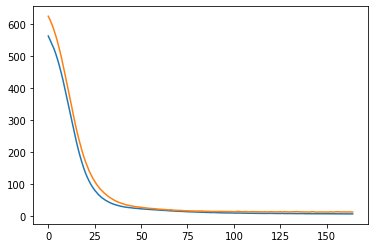

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()